# Predicting the Sale Price of Bulldozers using Machine Learning 🚜

In this notebook, we're going to go through a machine learning project to use the characteristics of bulldozers and their past sales prices to predict the sale price of future bulldozers based on their characteristics.

* **Inputs:** Bulldozer characteristics such as make year, base model, model series, state of sale (e.g. which US state was it sold in), drive system and more.
* **Outputs:** Bulldozer sale price (in USD).

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

And since we're going to predicting results with a time component (predicting future sales based on past sales), this is also known as a **time series** or **forecasting** problem.

### 6 Step Machine Learning Framework

#### 1. Problem Definition

The problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

#### 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) we see that it contains historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

#### 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible (a low error value means our model's predictions are close to what the real values are).

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

#### 4. Features

Features are different parts and attributes of the data.

During this step, we'll want to start finding out what we can about the data.

One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary which contains information about what each attribute of the dataset means.

For example:

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable |

We can download the full version of this file directly from the [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (Kaggle account required) or view it [on Google Sheets](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).

With all of this being known, let's get started!

First, we'll import the dataset and start exploring.

In [7]:
# This cell if Running this notebook on google colab
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# This cell if Running this notebook on google colab
# Changing working directory to the directory that contains this notebook (project directory)
%cd /content/drive/MyDrive/DS-ML-DL-AI/Data Science and Machine Learning/milestone-projects/End-to-End Bulldozer Price Regression

/content/drive/MyDrive/DS-ML-DL-AI/Data Science and Machine Learning/milestone-projects/End-to-End Bulldozer Price Regression


In [16]:
# Timestamp
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-10-25 05:33:26.717480


## 1. Importing the data and preparing it for modelling

First thing is first, let's get the libraries we need imported and the data we'll need for the project.

We'll start by importing pandas, NumPy and matplotlib.

In [10]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Print the versions we're using
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.2.2
NumPy version: 2.0.2
matplotlib version: 3.10.0


Now we've got our tools for data analysis ready, we can import the data and start to explore it.

Let's check what files are available.

In [11]:
import os
from pathlib import Path

dataset_dir = Path("data/bluebook-for-bulldozers")
print(f"[INFO] Files/folders available in {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Files/folders available in data/bluebook-for-bulldozers:


['Train.csv',
 'Machine_Appendix.csv',
 'Data Dictionary.xlsx',
 'Train.7z',
 'Test.csv',
 'TrainAndValid.7z',
 'TrainAndValid.csv',
 'Train.zip',
 'TrainAndValid.zip',
 'median_benchmark.csv',
 'Valid.csv',
 'ValidSolution.csv',
 'Valid.zip',
 'Valid.7z',
 'random_forest_benchmark_test.csv',
 'train_tmp.csv',
 'test_predictions.csv']

You can explore each of these files individually or read about them on the [Kaggle Competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

For now, the main file we're interested in is `TrainAndValid.csv` (this is also a combination of `Train.csv` and `Valid.csv`), this is a combination of the training and validation datasets.

* The training data (`Train.csv`) contains sale data from 1989 up to the end of 2011.
* The validation data (`Valid.csv`) contains sale data from January 1, 2012 - April 30, 2012.
* The test data (`Test.csv`) contains sale data from May 1, 2012 - November 2012.

We'll use the training data to train our model to predict the sale price of bulldozers, we'll then validate its performance on the validation data to see if our model can be improved in any way. Finally, we'll evaluate our best model on the test dataset.

But more on this later on.

Let's import the `TrainAndValid.csv` file and turn it into a pandas DataFrame.

### 1.1 Importing data and parsing dates

In [12]:
# Import the training and validation set
df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False, # set low_memory=False to prevent mixed data types warning
                 parse_dates=["saledate"]) # tell pandas which columns to read in as dates by setting the parse_dates parameter

In [13]:
# Get info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Looks like our `saledate` column is now of type [`datetime64[ns]`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.datetime64), a NumPy-specific datetime format with high precision.

We'll view a few samples from our `SaleDate` column.

In [14]:
df["saledate"][:10]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


Let's try visualize our `saledate` column against our `SalePrice` column.

To do so, we can create a scatter plot.

And to prevent our plot from being too big, we'll visualize the first 1000 values.

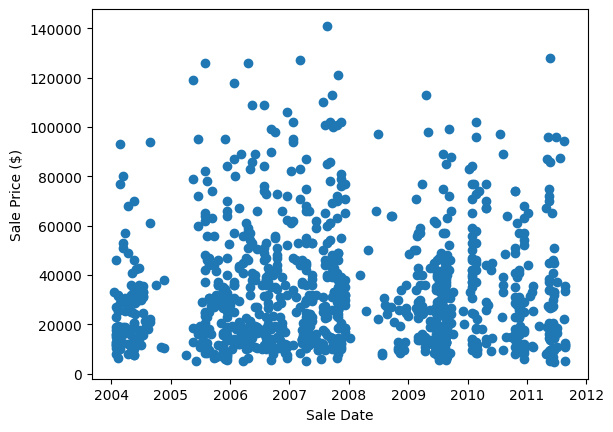

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

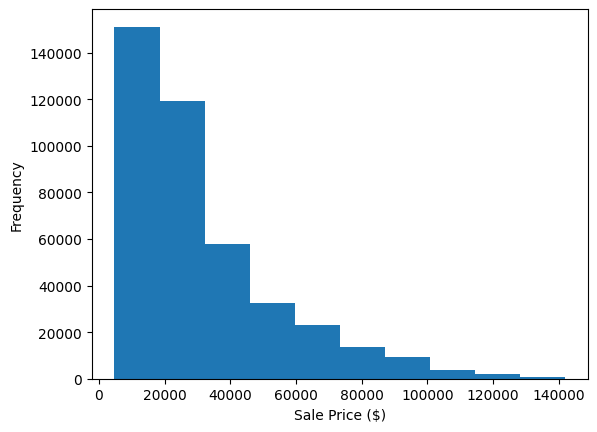

In [16]:
# View SalePrice distribution
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

### 1.2 Sorting our DataFrame by saledate

Considering this is a time series problem, sorting our DataFrame by date has the added benefit of making sure our data is sequential.

In [17]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

### 1.3 Adding extra features to our DataFrame

One way to potentially increase the predictive power of our data is to enhance it with more features.

This practice is known as [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), taking existing features and using them to create more/different features.

We'll use our `saledate` column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)

After we've added these extra columns, we can remove the original `saledate` column as its information will be dispersed across these new columns.

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [18]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [19]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

We could add more of these style of columns, such as, whether it was the start or end of a quarter (the sale being at the end of a quarter may bye influenced by things such as quarterly budgets) but these will do for now.

In [20]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


How about we view the first 10,000 samples to see if reveals anything about which month has the highest sales?

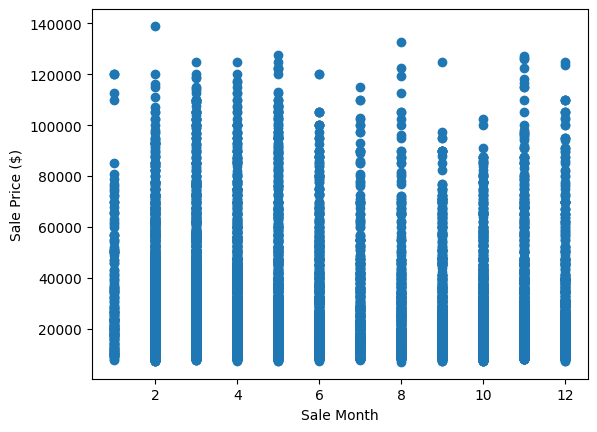

In [21]:
# 4805
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

Doesn't look like there's too much conclusive evidence here about which month has the highest sales value.

How about we plot the median sale price of each month?

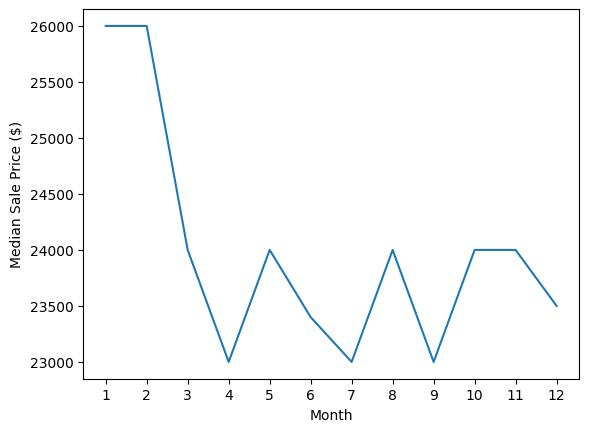

In [22]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xticks(list(range(1,13)))
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

It looks like the median sale prices of January and February (months 1 and 2) are quite a bit higher than the other months of the year.

Could this be because of New Year budget spending?

Perhaps... but this would take a bit more investigation.

### 1.4 Inspect values of other columns

How about we see which states sell the most bulldozers?

In [23]:
# Check the different values of different columns
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


Looks like Flordia sells a fair few bulldozers.

How about we group our samples by `state` and then find the median `SalePrice` per state?

We also compare this to the median `SalePrice` for all samples.

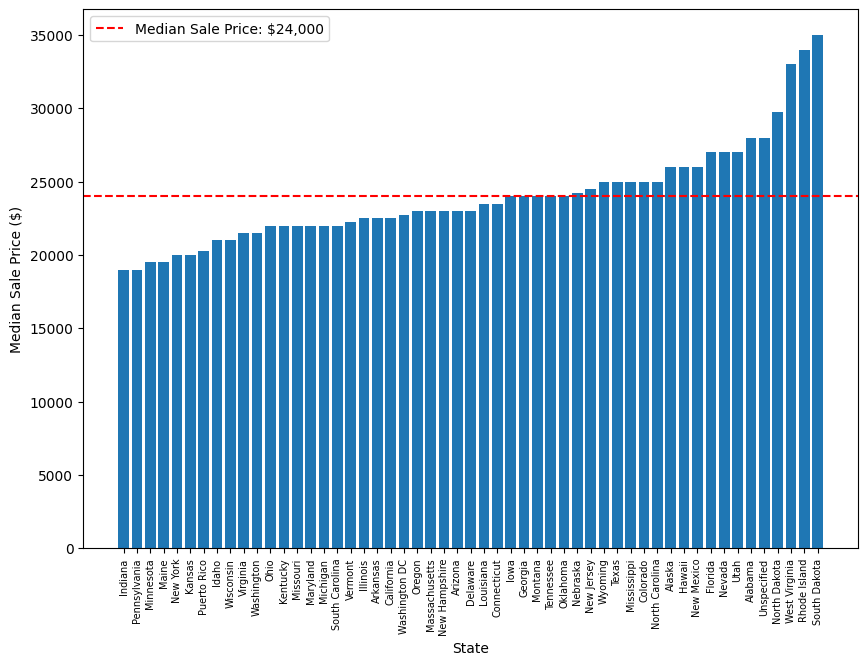

In [24]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median().sort_values(ascending=True)
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index,
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price,
            color="red",
            linestyle="--",
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

Interestingly Florida has the most sales and the median sale price is above the overall median of all states.

And if you had a bulldozer and were chasing the highest sale price, the data would reveal that perhaps selling in South Dakota would be your best bet.

Perhaps bulldozers are in higher demand in South Dakota because of a building or mining boom?

## 2. Model driven data exploration

We've performed a small Exploratory Data Analysis (EDA), now let's try to model it.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html) and taking into account the fact we've got over 100,000 examples, we find a [`sklearn.linear_model.SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) or a [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) model might be a good candidate.

But first, the problem here is that some of the features of our data are in string format and not to mention some of our samples have missing values.

And typically, machine learning models require all data to be in numerical format as well as all missing values to be filled.

Let's start to fix this by inspecting the different datatypes in our DataFrame.

In [25]:
# Check for missing values and different datatypes
df_tmp.info();

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Ok, it seems as though we've got a fair few different datatypes.

How about we find out how many missing values are in each column?

In [26]:
# Check for total missing values per column
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
fiModelDesc,0


It looks like our DataFrame has quite a few missing values.

How about we start by tring to turn all of our data in numbers?

### 2.1 Inspecting the datatypes in our dataset

In [27]:
# Get the dtype of a given column
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

In [28]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [29]:
# Check whether a column is a string
pd.api.types.is_string_dtype(df_tmp["state"])

True

In [30]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df_tmp.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['315CL'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['PC75'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: ['H'] | Example value dtype: string
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['South Carolina'] | Example value dtype: string
Column name: P

Looks like we've got sample outputs from all of the columns with the `object` datatype.

It also looks like that many of random samples are missing values.

### 2.2 Converting strings to categories

One way to convert object/string values to numerical values is to convert them to categories.

This datatype keeps the underlying data the same (e.g. doesn't change the string) but enables easy conversion to a numeric code using [`.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

For example, the column `state` might have the values `'Alabama', 'Alaska', 'Arizona'...` and these could be mapped to numeric values `1, 2, 3...` respectively.

Let's first convert the object datatype columns to `"category"` datatype.

In [31]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

Now let's check if it worked by calling `.info()` on our DataFrame.

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [33]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [34]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Finally, we can get the category codes (the numeric values representing the category) using [`pandas.Series.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

In [35]:
# Inspect the category codes
df_tmp.state.cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


This gives us a numeric representation of our object/string datatype columns.

In [36]:
# Get example string using category number
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number]
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 43 maps to: Texas


All of our data is categorical and thus we can now turn the categories into numbers.

### 2.3 Saving our preprocessed data (part 1)

Before we start doing any further preprocessing steps on our DataFrame, we'll save our current DataFrame to file so we could import it again later if necessary.

In [37]:
# Save preprocessed data to file
df_tmp.to_csv("data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv",
              index=False)

Now we've saved our preprocessed data to file, we can re-import it and make sure it's in the same format.

In [38]:
# Import preprocessed data to file
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv",
                     low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [39]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

All of the `category` datatype columns are back to the `object` datatype.

This happens because of the limitations of the CSV (`.csv`) file format, it doesn't preserve data types, rather it stores all the values as strings.

So when we read in a CSV, pandas defaults to interpreting strings as `object` datatypes.

We can easily convert them to the `category` datatype as we did before.

In [40]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

Now if we wanted to preserve the datatypes of our data, we can save to `parquet` or `feather` format.

In [41]:
# To save to parquet format requires pyarrow or fastparquet (or both)
# Install via `pip install pyarrow fastparquet`
df_tmp.to_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

In [42]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

### 2.4 Finding and filling missing values

In [43]:
# Check missing values
df_tmp.isna().sum().sort_values(ascending=False)

,0
Blade_Width,386715
Enclosure_Type,386715
Engine_Horsepower,386715
Tip_Control,386715
Pushblock,386715
Blade_Extension,386715
Scarifier,386704
Grouser_Tracks,367823
Hydraulics_Flow,367823
Coupler_System,367724


It seems like there are a fair few columns with missing values and there are several datatypes across these columns (numerical, categorical).

How about we break the problem down and work on filling each datatype separately?

### 2.5 Filling missing numerical values

We'll start by filling the missing numerical values in our data set.

How about we find out which numeric columns are missing values?

In [44]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):

        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)

        if pd.isnull(content).sum():
            print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype} | Has missing values: {False}")

Column name: SalesID | Column dtype: int64 | Example value: [1491511] | Example value dtype: integer | Has missing values: False
Column name: SalePrice | Column dtype: float64 | Example value: [12000.] | Example value dtype: floating | Has missing values: False
Column name: MachineID | Column dtype: int64 | Example value: [1153642] | Example value dtype: integer | Has missing values: False
Column name: ModelID | Column dtype: int64 | Example value: [1269] | Example value dtype: integer | Has missing values: False
Column name: datasource | Column dtype: int64 | Example value: [121] | Example value dtype: integer | Has missing values: False
Column name: auctioneerID | Column dtype: float64 | Example value: [1.] | Example value dtype: floating | Has missing values: True
Column name: YearMade | Column dtype: int64 | Example value: [2005] | Example value dtype: integer | Has missing values: False
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [nan] | Example 

Okay, it looks like our `auctioneerID` and `MachineHoursCurrentMeter` columns have missing numeric values.

### 2.6 Discussing possible ways to handle missing values

For missing numeric values, some potential options are:

| **Method** | **Pros**  | **Cons** |
|-----|-----|-----|
| **Fill with mean of column** | - Easy to calculate/implement <br> - Retains overall data distribution | - Averages out variation <br> - Affected by outliers (e.g. if one value is much higher/lower than others) |
| **Fill with median of column** | - Easy to calculate/implement <br> - Robust to outliers <br> - Preserves center of data  | - Ignores data distribution shape |
| **Fill with mode of column** | - Easy to calculate/implement <br> - More useful for categorical-like data | - May not make sense for continuous/numerical data  |
| **Fill with 0 (or another constant)** | - Simple to implement <br> - Useful in certain contexts like counts  | - Introduces bias (e.g. if 0 was a value that meant something) <br> - Skews data (e.g. if many missing values, replacing all with 0 makes it look like that's the most common value)  |
| **Forward/Backward fill (use previous/future values to fill future/previous values)**  | - Maintains temporal continuity (for time series) | - Assumes data is continuous, which may not be valid |
| **Use a calculation from other columns** | - Takes existing information and reinterprets it | - Can result in unlikely outputs if calculations are not continuous |
| **Interpolate  (e.g. like dragging a cell in Excel/Google Sheets)** | - Captures trends <br> - Suitable for ordered data | - Can introduce errors <br> - May assume linearity (data continues in a straight line) |
| **Drop missing values** | - Ensures complete data (only use samples with all information) <br> - Useful for small datasets | - Can result in data loss (e.g. if many missing values are scattered across columns, data size can be dramatically reduced) <br> - Reduces dataset size  |

But first let's find out how many mising values in each of `auctioneerID` and `MachineHoursCurrentMeter` columns

In [45]:
print(f"The count of missing values in column: auctioneerID is => {df_tmp.auctioneerID.isna().sum()} / {df_tmp.shape[0]}")
print(f"The count of missing values in column: MachineHoursCurrentMeter is => {df_tmp.MachineHoursCurrentMeter.isna().sum()} / {df_tmp.shape[0]}")

The count of missing values in column: auctioneerID is => 20136 / 412698
The count of missing values in column: MachineHoursCurrentMeter is => 265194 / 412698


In [46]:
# How many unique values in column auctioneerID
df_tmp.auctioneerID.unique().size

31

In [47]:
# Unique values in column auctioneerID
df_tmp.auctioneerID.unique()

array([18., 99.,  4.,  1.,  6., 24., 19., 10.,  2., 23., 11., 15., 25.,
       16., 13., 14.,  7., 21.,  5., 12., 28., 20., 22.,  9., 17.,  3.,
        8., nan, 27., 26.,  0.])

In [48]:
# The frequency of each value
df_tmp.auctioneerID.value_counts()

,count
auctioneerID,
1.0,192773
2.0,57441
3.0,30288
4.0,20877
99.0,12042
6.0,11950
7.0,7847
8.0,7419
5.0,7002


<Axes: >

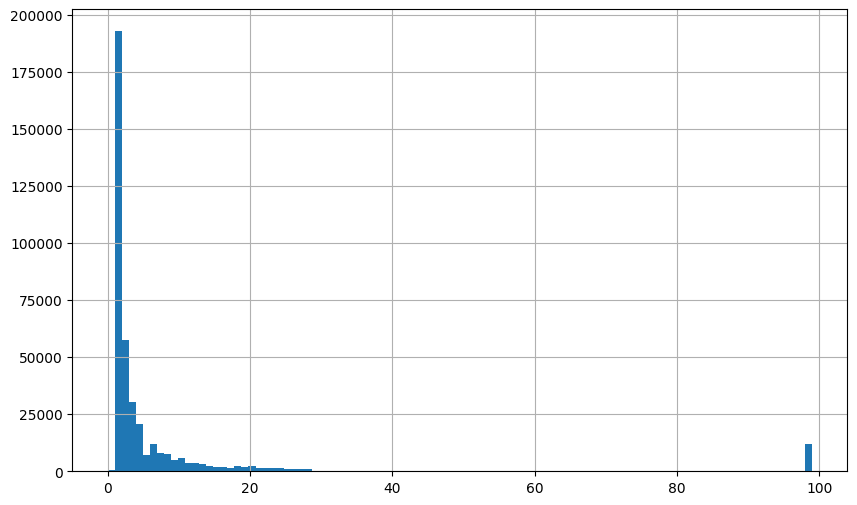

In [49]:
# The histogram of auctioneerID column
df_tmp.auctioneerID.hist(bins=100, figsize=(10, 6))

The distribution appears to be abnormal and there are only several values that are very frequent, unlike the rest of the other values

For now, we'll fill our missing numeric values with the median value of the target column.

We'll also add a binary column (0 or 1) with rows reflecting whether or not a value was missing.

In [50]:
# How many unique values in column MachineHoursCurrentMeter
df_tmp.MachineHoursCurrentMeter.unique().size

15634

In [51]:
print(f"Max value: {df_tmp.MachineHoursCurrentMeter.max()}")
print(f"Min value: {df_tmp.MachineHoursCurrentMeter.min()}")
print(f"Mode value: {df_tmp.MachineHoursCurrentMeter.mode()}")

Max value: 2483300.0
Min value: 0.0
Mode value: 0    0.0
Name: MachineHoursCurrentMeter, dtype: float64


In [52]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

Adding a binary column which indicates whether the value was missing or not helps to retain this information. It also means we can inspect these rows later on.

In [53]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
212720,1690985,22500.0,1511981,11586,132,4.0,1996,0.0,NaN,EX100-3,...,NaN,NaN,NaN,2006,10,21,5,294,0,1
45775,1815811,8000.0,1172547,5543,132,1.0,1972,0.0,NaN,275B,...,NaN,Standard,Conventional,1996,4,26,4,117,0,1
223380,1291676,27000.0,1450132,3190,132,8.0,1995,0.0,NaN,590SUPER L,...,NaN,NaN,NaN,2007,3,21,2,80,0,1
65167,1664690,13000.0,1426865,4986,132,5.0,1000,0.0,NaN,455C,...,NaN,NaN,NaN,1998,4,18,5,108,0,1
5916,1589324,8500.0,1399790,8174,132,1.0,1972,0.0,NaN,500,...,NaN,NaN,NaN,1990,3,27,1,86,0,1


How about we check again whether or not the numeric columns have missing values?

In [54]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):

        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)

        if pd.isnull(content).sum():
            print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype} | Has missing values: {False}")

Column name: SalesID | Column dtype: int64 | Example value: [1532009] | Example value dtype: integer | Has missing values: False
Column name: SalePrice | Column dtype: float64 | Example value: [7500.] | Example value dtype: floating | Has missing values: False
Column name: MachineID | Column dtype: int64 | Example value: [768185] | Example value dtype: integer | Has missing values: False
Column name: ModelID | Column dtype: int64 | Example value: [8016] | Example value dtype: integer | Has missing values: False
Column name: datasource | Column dtype: int64 | Example value: [132] | Example value dtype: integer | Has missing values: False
Column name: auctioneerID | Column dtype: float64 | Example value: [99.] | Example value dtype: floating | Has missing values: False
Column name: YearMade | Column dtype: int64 | Example value: [1994] | Example value dtype: integer | Has missing values: False
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [0.] | Example v

Numeric missing values filled.

And binary `_is_missing` columns help to check how many were missing.

In [55]:
# Check to see how many examples in the auctioneerID were missing
df_tmp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
0,392562
1,20136


### 2.7 Filling missing categorical values

Let's first investigate the columns which *aren't* numeric.

In [56]:
# Check for which none numeric columns have null values
print(f"[INFO] Columns which are not numeric:")
missing_value_column = 0
none_missing_value_column = 0
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # print(f"Column name: {label} | Column dtype: {df_tmp[label].dtype.name}")

        if pd.isnull(content).sum():
            print(f"Column name: {label} | Column dtype: {column_datatype} | Has missing values: {True}")
            missing_value_column += 1
        else:
            print(f"Column name: {label} | Column dtype: {column_datatype} | Has missing values: {False}")
            none_missing_value_column += 1
print(f"Number of columns that have missing valuea: {missing_value_column}")
print(f"Number of columns that don't have missing valuea: {none_missing_value_column}")

[INFO] Columns which are not numeric:
Column name: UsageBand | Column dtype: int64 | Has missing values: True
Column name: fiModelDesc | Column dtype: int64 | Has missing values: False
Column name: fiBaseModel | Column dtype: int64 | Has missing values: False
Column name: fiSecondaryDesc | Column dtype: int64 | Has missing values: True
Column name: fiModelSeries | Column dtype: int64 | Has missing values: True
Column name: fiModelDescriptor | Column dtype: int64 | Has missing values: True
Column name: ProductSize | Column dtype: int64 | Has missing values: True
Column name: fiProductClassDesc | Column dtype: int64 | Has missing values: False
Column name: state | Column dtype: int64 | Has missing values: False
Column name: ProductGroup | Column dtype: int64 | Has missing values: False
Column name: ProductGroupDesc | Column dtype: int64 | Has missing values: False
Column name: Drive_System | Column dtype: int64 | Has missing values: True
Column name: Enclosure | Column dtype: int64 | Has

We've got plenty of category type columns.

Let's now fill the missing categorical values as well as ensure they are numerical (non-string).

In [57]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {}

# 2. Turn categorical variables into numbers
for label, content in df_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))

        # 7. Set the column to the numerical values (the category code value)
        df_tmp[label] = content_category_codes

Let's check out a few random samples of our DataFrame.

In [58]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
209441,1495852,17000.0,145332,3537,132,8.0,1994,0.0,0,745,...,1,1,1,1,1,1,1,1,1,1
54902,1684792,66000.0,1127544,1990,132,18.0,1995,0.0,0,2681,...,0,0,0,0,0,1,1,1,1,1
283992,2262509,19000.0,249247,1681,136,12.0,1990,0.0,0,2469,...,0,0,0,0,0,1,1,1,1,1
194319,1593705,9000.0,1166945,7999,132,1.0,2000,0.0,0,361,...,1,1,1,1,1,1,1,1,1,1
402187,6310002,14500.0,1911123,9508,149,2.0,2006,0.0,0,613,...,0,0,0,0,0,1,1,1,1,1


Looks like our data is all in numerical form.

How about we investigate an item from our `column_to_category_dict`?

In [59]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


> **Note:** Categorical values do not necessarily have order. They are strictly a mapping from number to value. In this case, our categorical values are mapped in numerical order. If we feel that the order of a value may influence a model in a negative way (e.g. `1 -> High` is *lower* than `3 -> Medium` but should be *higher*), we may want to look into ordering the values in a particular way or using a different numerical encoding technique such as [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

In [60]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


How about we check to see all of the missing values have been filled?

In [61]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()
print(f"[INFO] Total missing values: {total_missing_values}")

[INFO] Total missing values: 0


### 2.8 Saving our preprocessed data (part 2)

One more step before we train new model!

Let's save our work so far so we could re-import our preprocessed dataset if we wanted to.

We'll save it to the `parquet` format again, this time with a suffix to show we've filled the missing values.

In [62]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

And to make sure it worked, we can re-import it.

In [63]:
# Read in preprocessed dataset
df_tmp = pd.read_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                         engine="auto")

In [64]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()
print(f"[INFO] Total missing values: {total_missing_values}")

[INFO] Total missing values: 0


Checkpoint reached!

We've turned all of our data into numbers as well as filled the missing values, time to try fitting a model to.

### 2.9 Fitting a machine learning model to our preprocessed data

Since our dataset has a substantial amount of rows (~400k+), let's first make sure the model will work on a smaller sample of 1000 or so.

> **Note:** It's common practice on machine learning problems to see if our experiments will work on smaller scale problems (e.g. smaller amounts of data) before scaling them up to the full dataset. This practice enables us to try many different kinds of experiments with faster runtimes. The benefit of this is that we can figure out what doesn't work before spending more time on what does.

Our `X` values (features) will be every column except the `SalePrice` column.

And our `y` values (labels) will be the entirety of the `SalePrice` column.

In [65]:
# check what are the unique column in the dataset
for column in list(df_tmp.columns):
    if df_tmp[column].is_unique:
        print(column)

SalesID


In [66]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Sample 1000 samples with random state 42
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k, y=y_sample_1k)

CPU times: user 3.62 s, sys: 555 ms, total: 4.17 s
Wall time: 2.98 s


RandomForestRegressor(n_jobs=-1)

In [67]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k, y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.957000309936127


The model got a pretty good score on only 1000 samples.

How about we try our model on the whole dataset?

In [68]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all, y=y_all)

CPU times: user 10min 31s, sys: 984 ms, total: 10min 32s
Wall time: 2min 39s


RandomForestRegressor(n_jobs=-1)

Ok, that took a little bit longer than fitting on 1000 samples

How about we score the model trained on all of the data?

In [ ]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all, y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.9875804339381649


Better score.

But we've evaluated our model on the same data it was trained on.

## 3. Splitting data into the right train/validation sets

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the train, validation and test sets are split according to dates.

This makes sense since we're working on a time series problem (using past sale prices to try and predict future sale prices).

In our case:

* Training data (`Train.csv`) = all samples up until 2011.
* Validation data (`Valid.csv`) = all samples form January 1, 2012 - April 30, 2012.
* Testing data (`Test.csv`) = all samples from May 1, 2012 - November 2012.

Previously we imported `TrainAndValid.csv` which is a combination of `Train.csv` and `Valid.csv` in one file.

We could split this based on the `saledate` column.

However, we could also import the `Train.csv` and `Valid.csv` files separately (we'll import `Test.csv` later on when we've trained a model).

We'll also import `ValidSolution.csv` which contains the `SalePrice` of `Valid.csv` and make sure we match the columns based on the `SalesID` key.

In [69]:
# Import train samples (making sure to parse dates and then sort by them)
train_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Train.csv",
                       parse_dates=["saledate"],
                       low_memory=False).sort_values(by="saledate", ascending=True)

# Import validation samples (making sure to parse dates and then sort by them)
valid_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Valid.csv",
                       parse_dates=["saledate"])

# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/ValidSolution.csv")

# Map valid_solution to valid_df
valid_df["SalePrice"] = valid_df["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])

# Make sure valid_df is sorted by saledate still
valid_df = valid_df.sort_values("saledate", ascending=True).reset_index(drop=True)

# How many samples are in each DataFrame?
print(f"[INFO] Number of samples in training DataFrame: {len(train_df)}")
print(f"[INFO] Number of samples in validation DataFrame: {len(valid_df)}")

[INFO] Number of samples in training DataFrame: 401125
[INFO] Number of samples in validation DataFrame: 11573


In [70]:
# Let's check out the training DataFrame
train_df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
215594,1680266,81000,1449000,11656,132,1.0,2005,NaN,NaN,2011-03-04,...,None or Unspecified,"9' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
268194,1805461,5000,1182590,9563,132,1.0,2000,NaN,NaN,2008-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221810,1691685,37000,1098596,2797,132,2.0,1997,NaN,NaN,2002-01-19,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
240841,1745140,49000,1258869,2219,132,1.0,1988,NaN,NaN,1994-09-20,...,None or Unspecified,"9' 6""",None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
353965,2424200,8000,1768977,668,136,1.0,2004,0.0,NaN,2010-03-25,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
# And how about the validation DataFrame?
valid_df.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
1651,6315517,1858191,26452,149,4,2007,NaN,NaN,2012-02-06,L180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,14000.0
9895,4279559,2293902,3350,172,1,1980,0.0,NaN,2012-04-02,120G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
5208,1225243,1022673,18164,121,3,2006,5132.0,Medium,2012-03-01,EC290BLC,...,None or Unspecified,Hydraulic,Yes,Double,NaN,NaN,NaN,NaN,NaN,68000.0
3593,6303390,1219975,619,149,1,2005,NaN,NaN,2012-02-13,WA380-5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,88000.0
2914,6258648,1826017,3192,149,1,2003,NaN,NaN,2012-02-13,590SUPER M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000.0


We've now got separate training and validation datasets imported.

Previously we created a function to decompose the `saledate` column into multiple features such as `saleYear`, `saleMonth`, `saleDay` and more.

We'll now replicate that function here and apply it to our `train_df` and `valid_df`.

In [71]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

train_df = add_datetime_features_to_df(df=train_df)
valid_df = add_datetime_features_to_df(df=valid_df)

In [72]:
# Display the last 5 columns (the recently added datetime breakdowns)
train_df.iloc[:, -5:].sample(5)

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
170917,2008,12,16,1,351
34673,2003,6,19,3,170
294157,2007,9,12,2,255
16831,2009,11,19,3,323
266555,2002,2,26,1,57


### 3.1 Encoding categorical features as numbers

To preprocess our data, we'll first define the numerical and categorical features of our dataset.

In [73]:
# Split data into X & y
X_train, y_train = train_df.drop("SalePrice", axis=1), train_df.SalePrice
X_valid, y_valid = valid_df.drop("SalePrice", axis=1), valid_df.SalePrice

# Define numerical and categorical features
numerical_features = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features[:10]}...")

[INFO] Numeric features: ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']
[INFO] Categorical features: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup']...


For now, we'll turning our categorical features into numbers (encode) (from object/string datatype to numeric datatype).

There are several encoders available for different use cases.

| Encoder | Description | Use case | For use on |
| ----- | ----- | ----- | ----- |
| [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) | Encode target labels with values between 0 and n_classes-1. | Useful for turning classification target values into numeric representations. | Target labels. |
| [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#onehotencoder) | Encode categorical features as a [one-hot numeric array](https://en.wikipedia.org/wiki/One-hot). | Turns every positive class of a unique category into a 1 and every negative class into a 0. | Categorical variables/features. |
| [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#ordinalencoder) | Encode categorical features as an integer array. | Turn unique categorical values into a range of integers, for example, 0 maps to 'cat', 1 maps to 'dog', etc. | Categorical variables/features. |
| [`TargetEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html#targetencoder) | Encode regression and classification targets into a shrunk estimate of the average target values for observations of the category. | Useful for converting targets into a certain range of values. | Target variables. |

We'll use the `OrdinalEncoder` class to fill any missing values (`NaN`).

We'll also make sure to only use the `OrdinalEncoder` on the categorical features of our DataFrame.

In [74]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Create an ordinal encoder (turns category items into numeric representation)
ordinal_encoder = OrdinalEncoder(categories="auto",
                                 handle_unknown="use_encoded_value",
                                 unknown_value=np.nan,
                                 encoded_missing_value=np.nan) # treat unknown categories as np.nan (or None)

# 2. Fit and transform the categorical columns of X_train
X_train_preprocessed = X_train.copy() # make copies of the oringal DataFrames so we can keep the original values in tact and view them later
X_train_preprocessed[categorical_features] = ordinal_encoder.fit_transform(X_train_preprocessed[categorical_features].astype(str)) # OrdinalEncoder expects all values as the same type (e.g. string or numeric only)

# 3. Transform the categorical columns of X_valid
X_valid_preprocessed = X_valid.copy()
X_valid_preprocessed[categorical_features] = ordinal_encoder.transform(X_valid_preprocessed[categorical_features].astype(str)) # only use `transform` on the validation data

First, we'll check out the original `X_train` DataFrame.

In [ ]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


And how about `X_train_preprocessed`?

In [ ]:
X_train_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,1126363,8434,132,18.0,1974,NaN,3.0,4536.0,1734.0,...,0.0,7.0,5.0,4.0,5.0,1989,1,17,1,17
92803,1404019,1169900,7110,132,99.0,1986,NaN,3.0,734.0,242.0,...,2.0,10.0,7.0,4.0,5.0,1989,1,31,1,31
98346,1415646,1262088,3357,132,99.0,1975,NaN,3.0,81.0,18.0,...,2.0,10.0,7.0,4.0,5.0,1989,1,31,1,31
169297,1596358,1433229,8247,132,99.0,1978,NaN,3.0,1157.0,348.0,...,2.0,10.0,7.0,3.0,1.0,1989,1,31,1,31
274835,1821514,1194089,10150,132,99.0,1980,NaN,3.0,1799.0,556.0,...,2.0,10.0,7.0,3.0,1.0,1989,1,31,1,31


All of the non-numerical values in `X_train` have been converted to numerical values in `X_train_preprocessed`.

Let's see the columns with missing values from `X_train`.

In [76]:
X_train[categorical_features].isna().sum().sort_values(ascending=False)

,0
Tip_Control,375906
Enclosure_Type,375906
Engine_Horsepower,375906
Blade_Extension,375906
Blade_Width,375906
Pushblock,375906
Scarifier,375895
Grouser_Tracks,357763
Hydraulics_Flow,357763
Coupler_System,357667


Ok, plenty of missing values.

How about `X_train_preprocessed`?

In [75]:
X_train_preprocessed[categorical_features].isna().sum().sort_values(ascending=False)

,0
UsageBand,0
fiModelDesc,0
fiBaseModel,0
fiSecondaryDesc,0
fiModelSeries,0
fiModelDescriptor,0
ProductSize,0
fiProductClassDesc,0
state,0
ProductGroup,0


Perfect! No missing values as well!

If we wanted to retrieve the original categorical values.

In [ ]:
# Let's inspect the first three categories
ordinal_encoder.categories_[:3]

[array(['High', 'Low', 'Medium', 'nan'], dtype=object),
 array(['100C', '104', '1066', ..., 'ZX800LC', 'ZX80LCK', 'ZX850H'],
       dtype=object),
 array(['10', '100', '104', ..., 'ZX80', 'ZX800', 'ZX850'], dtype=object)]

The categories will be in the order of the features seen (same order as the columns of the DataFrame).

So we can create a mapping of these using the categorical column names of our DataFrame.

In [77]:
# Create a dictionary of dictionaries mapping column names and their variables to their numerical encoding
column_to_category_mapping = {}

for column_name, category_values in zip(categorical_features, ordinal_encoder.categories_):
    int_to_category = {i: category for i, category in enumerate(category_values)}
    column_to_category_mapping[column_name] = int_to_category

# Inspect an example column name to category mapping
column_to_category_mapping["UsageBand"]

{0: 'High', 1: 'Low', 2: 'Medium', 3: 'nan'}

We can also reverse our `OrdinalEncoder` values

This is helpful for reversing a preprocessing step or viewing the original data again if necessary.

In [78]:
# Create a copy of the preprocessed DataFrame
X_train_unprocessed = X_train_preprocessed[categorical_features].copy()

# This will return an array of the original untransformed data
X_train_unprocessed = ordinal_encoder.inverse_transform(X_train_unprocessed)

# Turn back into a DataFrame for viewing pleasure
X_train_unprocessed_df = pd.DataFrame(X_train_unprocessed, columns=categorical_features)

# Check out a sample
X_train_unprocessed_df.sample(5)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
268197,nan,320CL,320,C,nan,L,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New York,TEX,...,32 inch,None or Unspecified,Manual,Yes,Triple,nan,nan,nan,nan,nan
149202,nan,330BL,330,B,nan,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Unspecified,TEX,...,34 inch,None or Unspecified,None or Unspecified,Yes,Double,nan,nan,nan,nan,nan
400169,nan,PC200LC6,PC200,nan,LC,6,Large / Medium,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",Tennessee,TEX,...,36 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan
264408,nan,D5MLGP,D5,M,nan,LGP,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Louisiana,TTT,...,nan,nan,nan,nan,nan,None or Unspecified,VPAT,Finger Tip,nan,nan
55140,nan,322L,322,nan,nan,L,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Tennessee,TEX,...,32 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan


In [79]:
X_train_preprocessed.isna().sum().sort_values(ascending=False)

,0
MachineHoursCurrentMeter,258360
auctioneerID,20136
SalesID,0
MachineID,0
datasource,0
ModelID,0
YearMade,0
UsageBand,0
fiModelDesc,0
fiBaseModel,0


### 3.2 Fitting a model to our preprocessed training data

We haven't yet done anything with missing numerical values.

Well, here are several estimators/models in Scikit-Learn that can handle missing (`NaN`) values.

And `sklearn.ensemble.RandomForestRegressor` is one of them!

Let's try it out on our `X_train_preprocessed` DataFrame.

In [80]:
%%time

# Instantiate a Random Forest Regression model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model to the preprocessed training data
model.fit(X=X_train_preprocessed,
          y=y_train)

CPU times: user 9min 20s, sys: 993 ms, total: 9min 21s
Wall time: 2min 22s


RandomForestRegressor(n_jobs=-1)

Let's see how our model scores on the validation set, data our model has never seen.

In [81]:
%%time

# Check model performance on the validation set
model.score(X=X_valid_preprocessed,
            y=y_valid)

CPU times: user 423 ms, sys: 2.01 ms, total: 425 ms
Wall time: 118 ms


0.872464930438524

## 4. Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

$$ \text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2} $$

Where:

* $ \hat{y}_i $ is the predicted value,  
* $ y_i $ is the actual value,  
* $ n $ is the number of observations.

Contrast this with mean absolute error (MAE), another common regression metric.

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right| $$

With RMSLE, the relative error is more meaningful than the absolute error. You care more about ratios than absolute errors. For example, being off by $100 on a $1000 prediction (10% error) is more significant than being off by $100 on a $10,000 prediction (1% error). RMSLE is sensitive to large percentage errors.

Where as with MAE, is more about exact differences, a $100 prediction error is weighted the same regardless of the actual value.

In each of case, a lower value (closer to 0) is better.

We'll use:

* MAE (mean absolute error) - lower is better.
* RMSLE (root mean squared log error) - lower is better.
* $R^2$ (R-squared or coefficient of determination) - higher is better.

In [82]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model,
                train_features=X_train_preprocessed,
                train_labels=y_train,
                valid_features=X_valid_preprocessed,
                valid_labels=y_valid):

    # Make predictions on train and validation features
    train_preds = model.predict(X=train_features)
    val_preds = model.predict(X=valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels,
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels,
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels,
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels,
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features,
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features,
                                       y=valid_labels)}
    return scores

In [83]:
# Try our model scoring function out
model_scores = show_scores(model=model)
model_scores

{'Training MAE': 1594.3504502254082,
 'Valid MAE': 6140.165700913045,
 'Training RMSLE': 0.08524067031915478,
 'Valid RMSLE': 0.25531731420271714,
 'Training R^2': 0.9873148100850607,
 'Valid R^2': 0.872464930438524}

## 5. Tuning our model's hyperparameters

Hyperparameters are the settings we can change on our model.

And tuning hyperparameters on a given model can often alter its performance on a given dataset.

Ideally, changing hyperparameters would lead to better results.

However, it's often hard to know what hyperparameter changes would improve a model ahead of time.

So what we can do is run several experiments across various different hyperparameter settings and record which lead to the best results.

### 5.1 Making our modelling experiments faster (to speed up hyperparameter tuning)

Because of the size of our dataset (~400,000 rows), retraining an entire model for each new set of hyperparameters would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

We'll be looking at 40x less samples which means we should get faster computation speeds but we should also  expect our results to worsen (because the model has less samples to learn patterns from).

Let's see if reducing the number samples speeds up our modelling time.

### 5.2 Hyperparameter tuning with RandomizedSearchCV

We'll define a dictionary of hyperparametmer settings in the form `{"hyperparamter_name": [values_to_test]}` and then use [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#randomizedsearchcv) (randomly search for best combination of hyperparameters) or [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#gridsearchcv) (exhaustively search for best combination of hyperparameters) to go through all of these settings for us on a given model and dataset and then record which perform best.

A general workflow is to start with a large number and wide range of potential settings and use `RandomizedSearchCV` to search across these randomly for a limited number of iterations (e.g. `n_iter=10`).

And then take the best results and narrow the search space down before exhaustively search for the best hyperparameters with `GridSearchCV`.

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 10, 20],
           "min_samples_split": np.arange(2, 10, 1), # min_samples_split must be an int in the range [2, inf) or a float in the range (0.0, 1.0]
           "min_samples_leaf": np.arange(1, 10, 1),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0".
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(), # can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=20,
                              # scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=3) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X=X_train_preprocessed,
             y=y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END max_depth=10, max_features=1.0, max_samples=10000, min_samples_leaf=1, min_samples_split=4, n_estimators=20;, score=0.526 total time=   4.5s
[CV 2/3] END max_depth=10, max_features=1.0, max_samples=10000, min_samples_leaf=1, min_samples_split=4, n_estimators=20;, score=0.714 total time=   4.4s
[CV 3/3] END max_depth=10, max_features=1.0, max_samples=10000, min_samples_leaf=1, min_samples_split=4, n_estimators=20;, score=0.594 total time=   4.2s
[CV 1/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=4, min_samples_split=2, n_estimators=170;, score=0.544 total time=  26.8s
[CV 2/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=4, min_samples_split=2, n_estimators=170;, score=0.759 total time=  26.6s
[CV 3/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=4, min_samples_split=2, n_estimators=170;, score=0.636 total time=  27.6s
[CV 1/

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': [0.5, 1.0, ...], 'max_samples': [10000], 'min_samples_leaf': array([1, 2, ..., 6, 7, 8, 9]), ...}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
# Find the best parameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

And we can evaluate this model with our `show_scores` function.

In [ ]:
# Evaluate the RandomizedSearch model
rs_model_scores = show_scores(rs_model)
rs_model_scores

{'Training MAE': 5788.038303678378,
 'Valid MAE': 7241.010114287176,
 'Training RMSLE': 0.26698001514456926,
 'Valid RMSLE': 0.30029508964418755,
 'Training R^2': 0.8514498071863201,
 'Valid R^2': 0.8315105075278137}

### 5.3 Training a model with the best hyperparameters

I tried 100 different combinations of hyperparameters (setting `n_iter=100` in `RandomizedSearchCV`) and found the best results came from the settings below.

* `n_estimators=90`
* `max_depth=None`
* `min_samples_leaf=1`
* `min_samples_split=5`
* `max_features=0.5`
* `n_jobs=-1`
* `max_samples=None`

In [84]:
%%time

# Create a model with best found hyperparameters
# Note: There may be better values out there with longer searches but these are
# the best I found with a ~2 hour search.
ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train_preprocessed,
                y=y_train)

CPU times: user 4min 1s, sys: 429 ms, total: 4min 1s
Wall time: 1min 1s


RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

Evaluating `ideal_model` with `show_scores` function.

In [85]:
%%time

# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

CPU times: user 19.8 s, sys: 62.9 ms, total: 19.8 s
Wall time: 5.13 s


{'Training MAE': 1960.2728210926382,
 'Valid MAE': 5949.244521577559,
 'Training RMSLE': 0.10236816846441556,
 'Valid RMSLE': 0.2470721201224435,
 'Training R^2': 0.9809456076041746,
 'Valid R^2': 0.8820302326218736}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

## 6. Saving our best model to file

Since we've confirmed our best model as our `ideal_model` object, we can save it to file so we can load it in later and use it without having to retrain it.

In [86]:
import joblib

bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"

# Save model to file
joblib.dump(value=ideal_model,
            filename=bulldozer_price_prediction_model_name)

['randomforest_regressor_best_RMSLE.pkl']

In [87]:
# Load the best model
best_model = joblib.load(filename=bulldozer_price_prediction_model_name)
best_model

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

In [88]:
# Confirm that the model works
best_model_scores = show_scores(model=best_model)
best_model_scores

{'Training MAE': 1960.2728210926382,
 'Valid MAE': 5949.244521577559,
 'Training RMSLE': 0.10236816846441556,
 'Valid RMSLE': 0.2470721201224435,
 'Training R^2': 0.9809456076041746,
 'Valid R^2': 0.8820302326218736}

And to confirm our `ideal_model` and `best_model` results are very close (if not the exact same), we can compare them

In [89]:
# See if loaded model and pre-saved model results are the same
# Note: these values may be very slightly different depending on how precise the computer stores values.
best_model_scores["Valid RMSLE"] == ideal_model_scores["Valid RMSLE"]

True

In [90]:
# Is the loaded model as good as the non-loaded model?
if np.isclose(a=best_model_scores["Valid RMSLE"],
              b=ideal_model_scores["Valid RMSLE"],
              atol=1e-4): # Make sure values are within 0.0001 of each other
    print(f"[INFO] Model results are close!")
else:
    print(f"[INFO] Model results aren't close, did something go wrong?")

[INFO] Model results are close!


## 7. Making predictions on test data

In [91]:
# Load the test data
test_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### 7.1 Preprocessing the test data (to be in the same format as the training data)

In [92]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

# Preprocess test_df to have same columns as train_df (add the datetime features)
test_df = add_datetime_features_to_df(df=test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


In [93]:
# Create a copy of the test DataFrame to keep the original intact
test_df_preprocessed = test_df.copy()

# Transform the categorical features of the test DataFrame into numbers
test_df_preprocessed[categorical_features] = ordinal_encoder.transform(test_df_preprocessed[categorical_features].astype(str))
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 12457 non-null  float64
 8   fiModelDesc               12349 non-null  float64
 9   fiBaseModel               12431 non-null  float64
 10  fiSecondaryDesc           12449 non-null  float64
 11  fiModelSeries             12456 non-null  float64
 12  fiModelDescriptor         12452 non-null  float64
 13  ProductSize               12457 non-null  float64
 14  fiProd

Ok, date features created and categorical features turned into numbers, we can make predictions on the test data now

In [94]:
# Make predictions on the preprocessed test data
test_preds = best_model.predict(test_df_preprocessed)

In [95]:
# Check the first 10 test predictions
test_preds[:10]

array([14720.41887125, 32849.36067019, 48401.44620811, 95442.57936508,
       26775.49482924, 30577.31481481, 25539.65247715, 20003.91975309,
       19335.46601547, 32199.23941799])

In [96]:
# Check number of test predictions
test_preds.shape, test_df.shape

((12457,), (12457, 56))

Now we would submit our predictions to Kaggle.

Well, when looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format.

Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

In [97]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df = pd.DataFrame()
pred_df["SalesID"] = test_df["SalesID"]
pred_df["SalePrice"] = test_preds
pred_df.sample(5)

,SalesID,SalePrice
456,1229477,56747.156085
834,1230760,27907.901235
5460,6285658,8544.559083
6199,6300382,40468.022086
6461,6304318,67990.449735


Let's save this to CSV so we could upload it or share it with someone else if we had to.

In [98]:
# Export test dataset predictions to CSV
pred_df.to_csv("data/bluebook-for-bulldozers/predictions.csv",
               index=False)

## 8. Making a prediction on a custom sample

We've made predictions on the test dataset which contains sale data from May to November 2012.

But how does our model go on a more recent bulldozer sale?

In [99]:
# Get example from test_df
test_df_preprocessed_sample = test_df_preprocessed.sample(n=1, random_state=42)

# Turn back into original format
test_df_unpreprocessed_sample = test_df_preprocessed_sample.copy()
test_df_unpreprocessed_sample[categorical_features] = ordinal_encoder.inverse_transform(test_df_unpreprocessed_sample[categorical_features])
test_df_unpreprocessed_sample.to_dict(orient="records")

[{'SalesID': 1229148,
  'MachineID': 1042578,
  'ModelID': 9579,
  'datasource': 121,
  'auctioneerID': 3,
  'YearMade': 2004,
  'MachineHoursCurrentMeter': 3290.0,
  'UsageBand': 'Medium',
  'fiModelDesc': 'S250',
  'fiBaseModel': 'S250',
  'fiSecondaryDesc': 'nan',
  'fiModelSeries': 'nan',
  'fiModelDescriptor': 'nan',
  'ProductSize': 'nan',
  'fiProductClassDesc': 'Skid Steer Loader - 2201.0 to 2701.0 Lb Operating Capacity',
  'state': 'Missouri',
  'ProductGroup': 'SSL',
  'ProductGroupDesc': 'Skid Steer Loaders',
  'Drive_System': 'nan',
  'Enclosure': 'EROPS',
  'Forks': 'None or Unspecified',
  'Pad_Type': 'nan',
  'Ride_Control': 'nan',
  'Stick': 'nan',
  'Transmission': 'nan',
  'Turbocharged': 'nan',
  'Blade_Extension': 'nan',
  'Blade_Width': 'nan',
  'Enclosure_Type': 'nan',
  'Engine_Horsepower': 'nan',
  'Hydraulics': 'Auxiliary',
  'Pushblock': 'nan',
  'Ripper': 'nan',
  'Scarifier': 'nan',
  'Tip_Control': 'nan',
  'Tire_Size': 'nan',
  'Coupler': 'Hydraulic',
  'C

In [100]:
# Make a prediction on the preprocessed test sample
best_model.predict(test_df_preprocessed_sample)

array([13569.81541607])

I've searched the internet for "bulldozer sales in America" and [found a sale from 6th July 2024](https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri).

I took information from this advertisement to create our own custom sample for testing our machine learning model on data from the wild.

I went through the advertisement online and collected as much detail as I could and formatted the dictionary below with all of the related fields.

It may not be perfect but data in the real world is rarely perfect.

For values I couldn't find or were inconspicuous, I filled them with `np.nan` (or `NaN`).

Some values such as `SalesID` were unobtainable because they were part of the original collected dataset, for these I've also used `np.nan`.

Also I've already created the extra date features `saleYear`, `saleMonth`, `saleDay` and more by manually breaking down the listed sale date of 6 July 2024.

In [ ]:
# Create a dictionary of features and values from an internet-based bulldozer advertisement
# See link: https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri (note: this link is/was valid as of October 2025 but may be invalid in the future)
custom_sample = {
  "SalesID": np.nan,
  "MachineID": 8504,
  "ModelID": np.nan,
  "datasource": np.nan,
  "auctioneerID": np.nan,
  "YearMade": 2004,
  "MachineHoursCurrentMeter": 11770.0,
  "UsageBand": "High",
  "fiModelDesc": "D6RXL",
  "fiBaseModel": "D6",
  "fiSecondaryDesc": "XL",
  "fiModelSeries": np.nan,
  "fiModelDescriptor": np.nan,
  "ProductSize": "Medium",
  "fiProductClassDesc": "Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower",
  "state": "Missouri",
  "ProductGroup": "TTT",
  "ProductGroupDesc": "Track Type Tractors",
  "Drive_System": "No",
  "Enclosure": "EROPS",
  "Forks": "None or Unspecified",
  "Pad_Type": "Grouser",
  "Ride_Control": "None or Unspecified",
  "Stick": "nan",
  "Transmission": "Powershift",
  "Turbocharged": "None or Unspecified",
  "Blade_Extension": "None or Unspecified",
  "Blade_Width": np.nan,
  "Enclosure_Type": np.nan,
  "Engine_Horsepower": np.nan,
  "Hydraulics": np.nan,
  "Pushblock": "None or Unspecified",
  "Ripper": "None or Unspecified",
  "Scarifier": "None or Unspecified",
  "Tip_Control": "Tip",
  "Tire_Size": np.nan,
  "Coupler": np.nan,
  "Coupler_System": np.nan,
  "Grouser_Tracks": "Yes",
  "Hydraulics_Flow": np.nan,
  "Track_Type": "Steel",
  "Undercarriage_Pad_Width": "22 inch",
  "Stick_Length": np.nan,
  "Thumb": np.nan,
  "Pattern_Changer": np.nan,
  "Grouser_Type": "Single",
  "Backhoe_Mounting": "None or Unspecified",
  "Blade_Type": "Semi U",
  "Travel_Controls": np.nan,
  "Differential_Type": np.nan,
  "Steering_Controls": "Command Control",
  "saleYear": 2024,
  "saleMonth": 6,
  "saleDay": 7,
  "saleDayofweek": 5,
  "saleDayofyear": 159
}

Now we've got a single custom sample in the form of a dictionary, we can turn it into a DataFrame.

In [ ]:
# Turn single sample in a DataFrame
custom_sample_df = pd.DataFrame(custom_sample, index=[0])
custom_sample_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,High,D6RXL,D6,...,None or Unspecified,Semi U,NaN,NaN,Command Control,2024,6,7,5,159


In [ ]:
# Transform the categorical features of the custom sample
custom_sample_df[categorical_features] = ordinal_encoder.transform(custom_sample_df[categorical_features].astype(str))
custom_sample_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,0.0,2308.0,703.0,...,0.0,6.0,7.0,4.0,0.0,2024,6,7,5,159


In [ ]:
# Make a prediction on the preprocessed custom sample
custom_sample_pred = best_model.predict(custom_sample_df)
print(f"[INFO] Predicted sale price of custom sample: ${round(custom_sample_pred[0], 2)}")

[INFO] Predicted sale price of custom sample: $51474.96


Now how close was this to the actual sale price (listed on the advertisement) of $72,600?

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Evaluate our model versus the actual sale price
custom_sample_actual_sale_price = [72600] # this is the sale price listed on the advertisement

print(f"[INFO] Model MAE on custom sample: {mean_absolute_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")
print(f"[INFO] Model RMSLE on custom sample: {root_mean_squared_log_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")

[INFO] Model MAE on custom sample: 21125.040564373892
[INFO] Model RMSLE on custom sample: 0.3438638042344433


We get a quite high MAE value.

Not too bad for a model trained on sales data over 12 years older than our custom sample's sale date.

## 9. Finding the most important predictive features

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In [ ]:
# Find feature importance of our best model
best_model_feature_importances = best_model.feature_importances_
best_model_feature_importances

array([3.78948522e-02, 2.70954102e-02, 5.85804002e-02, 1.79438322e-03,
       5.25621132e-03, 1.92040831e-01, 6.71461619e-03, 1.42137572e-03,
       4.79324438e-02, 4.73967258e-02, 4.12235661e-02, 4.75379381e-03,
       2.55283197e-02, 1.60578799e-01, 5.08919397e-02, 8.34245434e-03,
       3.43077232e-03, 4.16871935e-03, 1.45645185e-03, 6.32089976e-02,
       1.93106853e-03, 7.91189110e-04, 2.16468186e-03, 2.42755109e-04,
       1.44729959e-03, 1.10292279e-04, 4.69525167e-03, 4.70046399e-03,
       2.18877572e-03, 4.03668217e-03, 4.46781002e-03, 2.86947732e-03,
       5.20668987e-03, 3.50894384e-03, 1.75215277e-03, 1.16769900e-02,
       1.84682779e-03, 2.08450645e-02, 1.17370327e-02, 5.26785421e-03,
       2.07101299e-03, 1.36424627e-03, 1.60680297e-03, 9.71604299e-04,
       7.85735364e-04, 7.29302663e-04, 6.74283032e-04, 3.28828690e-03,
       2.83781098e-03, 3.92432694e-04, 4.73081800e-04, 7.26042221e-02,
       5.42512552e-03, 8.54840059e-03, 4.42773246e-03, 1.26015531e-02])

Looks like we get one value per feature in our dataset.

We can inspect these further by turning them into a DataFrame.

We'll sort it descending order so we can see which feature our model is assigning the highest value.

In [ ]:
# Create feature importance DataFrame
column_names = test_df.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": best_model_feature_importances}).sort_values(by="feature_importance",
                                                                                                         ascending=False)
feature_importance_df.head()

,feature_names,feature_importance
5,YearMade,0.192041
13,ProductSize,0.160579
51,saleYear,0.072604
19,Enclosure,0.063209
2,ModelID,0.058580


Looks like `YearMade` may be contributing the most value in the model's eyes.

We'll turn our DataFrame into a plot to compare values.

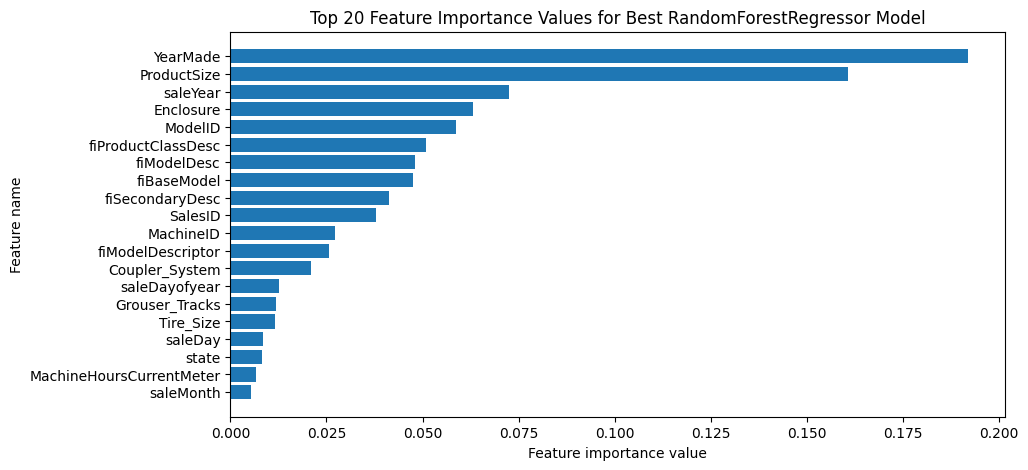

In [ ]:
# Plot the top feature importance values
top_n = 20
plt.figure(figsize=(10, 5))
plt.barh(y=feature_importance_df["feature_names"][:top_n], # Plot the top_n feature importance values
         width=feature_importance_df["feature_importance"][:top_n])
plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
plt.xlabel("Feature importance value")
plt.ylabel("Feature name")
plt.gca().invert_yaxis();

Looks like the top 4 features contributing to our model's predictions are `YearMade`, `ProductSize`, `saleYear` and `Enclosure`.

Referring to the original [data dictionary](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing), do these values make sense to be contributing the most to the model?

* `YearMade` - Year of manufacture of the machine.
* `ProductSize` - Size of the bulldozer.
* `saleYear` - The year the bulldozer was sold (this is one of our engineered features from `saledate`).
* `Enclosure` - Type of bulldozer enclosure (e.g. OROPS = Open Rollover Protective Structures, EROPS = Enclosed Rollover Protective Structures).

Now I've never sold a bulldozer but reading about each of these values seems to make sense that they would contribute significantly to the sale price.

Let's check out the unique values for `ProductSize` and `Enclosure`.

In [ ]:
print(f"[INFO] Unique ProductSize values: {train_df['ProductSize'].unique()}")
print(f"[INFO] Unique Enclosure values: {train_df['Enclosure'].unique()}")

[INFO] Unique ProductSize values: ['Medium' nan 'Compact' 'Small' 'Large' 'Large / Medium' 'Mini']
[INFO] Unique Enclosure values: ['OROPS' 'EROPS' 'EROPS w AC' nan 'EROPS AC' 'NO ROPS'
 'None or Unspecified']


My guess is that a bulldozer with a `ProductSize` of `'Mini'` would sell for less than a bulldozer with a size of `'Large'`.

We could investigate this further in an extension to model driven data exploratory analysis or we could take this information to a colleague or client to discuss further.

Either way, we've now got a machine learning model capable of predicting the sale price of bulldozers given their features/attributes!